In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [14]:
true_df = pd.read_csv('./Dataset/True.csv')
fake_df = pd.read_csv('./Dataset/Fake.csv')

In [15]:
print('Duplicated rows in True dataset:')
display(true_df[true_df.duplicated(keep=False)].sort_values(by='text'))
print('Duplicated rows in Fake dataset:')
display(fake_df[fake_df.duplicated(keep=False)].sort_values(by='text'))

Duplicated rows in True dataset:


,title,text,subject,date
11816,Russia detains Norwegian citizen over suspecte...,(Corrects a Dec. 19 story to make clear in gr...,worldnews,"December 19, 2017"
11720,Russia detains Norwegian citizen over suspecte...,(Corrects a Dec. 19 story to make clear in gr...,worldnews,"December 19, 2017"
11777,UK's May to visit China around Jan. 31: Sky News,(Reuters) - British Prime Minister Theresa May...,worldnews,"December 20, 2017"
11681,UK's May to visit China around Jan. 31: Sky News,(Reuters) - British Prime Minister Theresa May...,worldnews,"December 20, 2017"
11800,"Germany's conservatives, SPD start talks Jan. ...",(Reuters) - German Chancellor Angela Merkel s ...,worldnews,"December 20, 2017"
...,...,...,...,...
11272,Reuters journalists in Myanmar appear in court...,YANGON (Reuters) - Two Reuters journalists who...,worldnews,"December 27, 2017"
19042,Couple defy Hurricane Maria on roof to save pe...,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",worldnews,"September 26, 2017"
19041,Couple defy Hurricane Maria on roof to save pe...,"YAUCO, Puerto Rico (Reuters) - Hurricane Maria...",worldnews,"September 26, 2017"
11802,Swiss government urges voters to reject call f...,ZURICH (Reuters) - The Swiss government urged ...,worldnews,"December 20, 2017"


Duplicated rows in Fake dataset:


,title,text,subject,date
11445,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
9941,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
14924,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


In [16]:
print('Rows with empty / short text in True dataset:')
display(true_df[true_df['text'].str.len() < 10].sort_values('text'))
print('Rows with empty / short text in Fake dataset:')
display(fake_df[fake_df['text'].str.len() < 10].sort_values('text'))

Rows with empty / short text in True dataset:


,title,text,subject,date
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016"


Rows with empty / short text in Fake dataset:


,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
16173,TREY GOWDY ON SPYING ON AMERICAN CITIZENS…Like...,,Government News,"Mar 28, 2017"
16178,SENIOR CIA INTEL: “Wiretapping of Trump Transi...,,Government News,"Mar 27, 2017"
16180,THE HORRIBLE END GAME: BERNIE SANDERS Calls fo...,,Government News,"Mar 26, 2017"
16182,OUTRAGEOUS! NANCY PELOSI Claims Obamacare Hono...,,Government News,"Mar 25, 2017"
...,...,...,...,...
11685,ARROGANT ILLEGAL ALIEN Who Voted 5 Times In 20...,Watch:,politics,"Feb 11, 2017"
19156,ARROGANT ILLEGAL ALIEN Who Voted 5 Times In 20...,Watch:,left-news,"Feb 11, 2017"
12174,ARMY-NAVY CROWD ERUPTS During Trump Interview…...,Watch:,politics,"Dec 10, 2016"
19235,TRUMP’S BRILLIANT Director Of Communications O...,Watch:,left-news,"Jan 28, 2017"


In [17]:
print('Some Rows with invalid date in Fake dataset:')
display(fake_df.groupby('date')[['date']].count())

Some Rows with invalid date in Fake dataset:


,date
date,
14-Feb-18,1
15-Feb-18,9
16-Feb-18,8
17-Feb-18,7
18-Feb-18,7
...,...
https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/,1
https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/,1
https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/,1


# Clean data

In [5]:
# Remove duplicated rows
true_df = true_df[~true_df.duplicated()]
fake_df = fake_df[~fake_df.duplicated()]

# Remove rows with empty / short text
true_df = true_df[true_df['text'].str.len() > 10]
fake_df = fake_df[fake_df['text'].str.len() > 10]

# Convert date string to date
true_df['date'] = pd.to_datetime(true_df['date'], errors='coerce')
fake_df['date'] = pd.to_datetime(fake_df['date'], errors='coerce')

# Remove rows with non-date values in 'date' column
true_df.dropna(inplace = True)
fake_df.dropna(inplace = True)

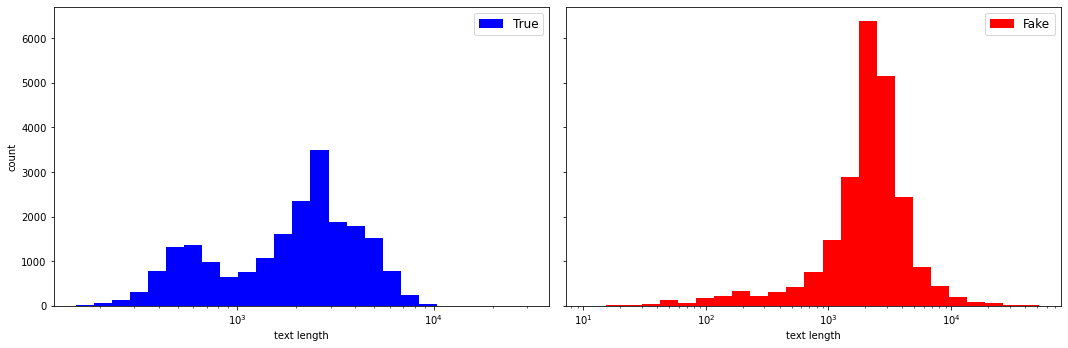

In [6]:

true_df['text_len'] = true_df['text'].str.len()
true_df['text_len_log'] = round(np.log10(true_df['text_len']), 0)

fake_df['text_len'] = fake_df['text'].str.len()
fake_df['text_len_log'] = round(np.log10(fake_df['text_len']), 0)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, tight_layout=True)
plt.rc('font', size=12)

hist, bins = np.histogram(true_df['text_len'], bins=25)
logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))

axs[0].hist(true_df['text_len'], bins=logbins, label='True', color='Blue')
axs[0].set_xscale('log')
axs[0].set_xlabel('text length')
axs[0].set_ylabel('count')
axs[0].legend()

hist, bins = np.histogram(fake_df['text_len'], bins=25)
logbins = np.logspace(np.log10(bins[0]), np.log10(bins[-1]), len(bins))
axs[1].hist(fake_df['text_len'], bins=logbins, label='Fake', color='Red')
axs[1].set_xscale('log')
axs[1].set_xlabel('text length')
# axs[1].set_ylabel('count')
axs[1].legend()

plt.show()

# Count Entry by Date

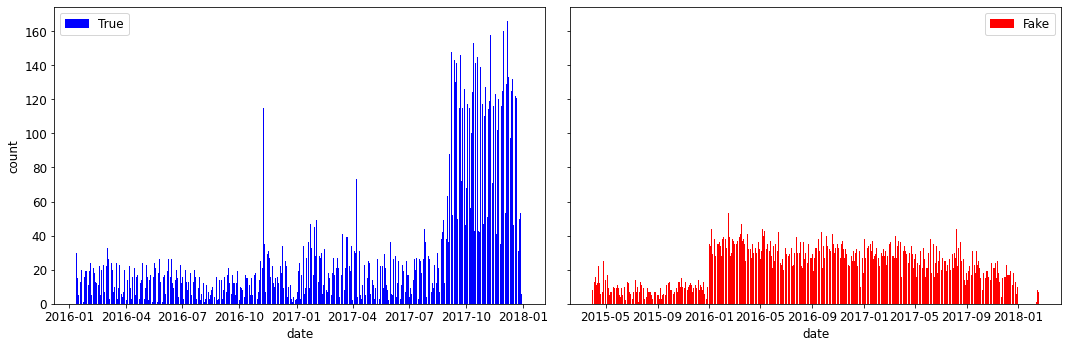

In [7]:
count_true_entry_by_date = true_df.groupby(['date'])['date'].count()
count_fake_entry_by_date = fake_df.groupby(['date'])['date'].count()

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, tight_layout=True)
plt.rc('font', size=12)

axs[0].bar(count_true_entry_by_date.index, count_true_entry_by_date.values, label='True', color='Blue')
axs[0].set_xlabel('date')
axs[0].set_ylabel('count')
axs[0].legend()

axs[1].bar(count_fake_entry_by_date.index, count_fake_entry_by_date.values, label='Fake', color='Red')
axs[1].set_xlabel('date')
# axs[1].set_ylabel('count')
axs[1].legend()

plt.show()

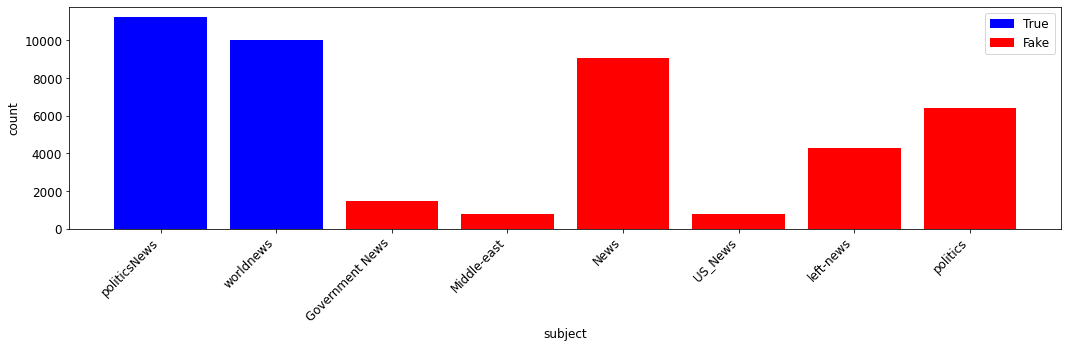

In [8]:
count_true_entry_by_subject = true_df.groupby(['subject'])['subject'].count()
count_fake_entry_by_subject = fake_df.groupby(['subject'])['subject'].count()

fig, axs = plt.subplots(1, 1, figsize=(15, 5), sharey=True, tight_layout=True)
plt.rc('font', size=12)

axs.bar(
    count_true_entry_by_subject.index, count_true_entry_by_subject.values, label='True', color='Blue'
)
plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
axs.set_xlabel('subject')
axs.set_ylabel('count')
axs.legend()

axs.bar(
    count_fake_entry_by_subject.index, count_fake_entry_by_subject.values, label='Fake', color='Red'
)
plt.setp(axs.get_xticklabels(), rotation=45, ha='right')
axs.set_xlabel('subject')
# axs[1].set_ylabel('count')
axs.legend()

plt.show()

# Checking Normality

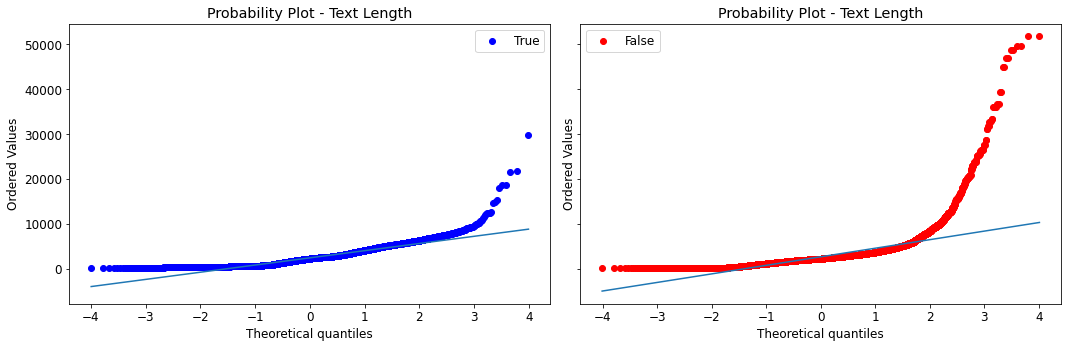

In [9]:
true_probplot_quantile, true_probplot_fit = stats.probplot(true_df['text_len'], plot=None)
fake_probplot_quantile, fake_probplot_fit = stats.probplot(fake_df['text_len'], plot=None)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, tight_layout=True)
plt.rc('font', size=12)

axs[0].scatter(true_probplot_quantile[0], true_probplot_quantile[1], label='True', color='Blue')
axs[0].plot(
    true_probplot_quantile[0], 
    (true_probplot_quantile[0] * true_probplot_fit[0] + true_probplot_fit[1]),
)
axs[0].set_title('Probability Plot - Text Length')
axs[0].set_xlabel('Theoretical quantiles')
axs[0].set_ylabel('Ordered Values')
axs[0].legend()

axs[1].scatter(fake_probplot_quantile[0], fake_probplot_quantile[1], label='False', color='Red')
axs[1].plot(
    fake_probplot_quantile[0], 
    (fake_probplot_quantile[0] * fake_probplot_fit[0] + fake_probplot_fit[1]),
)
axs[1].set_title('Probability Plot - Text Length')
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Ordered Values')
axs[1].legend()

plt.show()

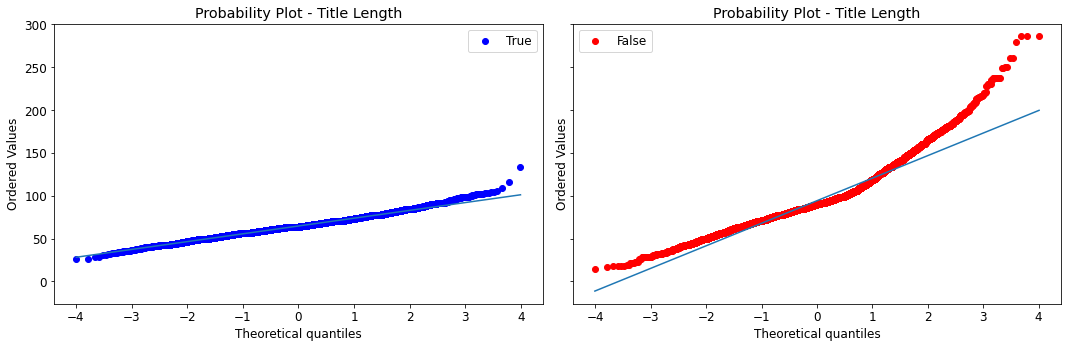

In [10]:
true_probplot_quantile, true_probplot_fit = stats.probplot(true_df['title'].str.len(), plot=None)
fake_probplot_quantile, fake_probplot_fit = stats.probplot(fake_df['title'].str.len(), plot=None)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, tight_layout=True)
plt.rc('font', size=12)

axs[0].scatter(true_probplot_quantile[0], true_probplot_quantile[1], label='True', color='Blue')
axs[0].plot(
    true_probplot_quantile[0], 
    (true_probplot_quantile[0] * true_probplot_fit[0] + true_probplot_fit[1]),
)
axs[0].set_title('Probability Plot - Title Length')
axs[0].set_xlabel('Theoretical quantiles')
axs[0].set_ylabel('Ordered Values')
axs[0].legend()

axs[1].scatter(fake_probplot_quantile[0], fake_probplot_quantile[1], label='False', color='Red')
axs[1].plot(
    fake_probplot_quantile[0], 
    (fake_probplot_quantile[0] * fake_probplot_fit[0] + fake_probplot_fit[1]),
)
axs[1].set_title('Probability Plot - Title Length')
axs[1].set_xlabel('Theoretical quantiles')
axs[1].set_ylabel('Ordered Values')
axs[1].legend()

plt.show()